In [1]:
# 任务: 通过神经网络从原始数据中发现因子, 并拟合模型
import pandas as pd
from scutquant import scutquant, alpha

In [2]:
df_train = pd.read_csv('D:/Desktop/CSI300.csv')
df_test = pd.read_csv('D:/Desktop/CSI300_test.csv')
df_train.set_index(['datetime', 'instrument'], inplace=True)
df_test.set_index(['datetime', 'instrument'], inplace=True)

df = pd.concat([df_train, df_test], axis=0)

df['label'] = scutquant.price2ret(df['close'], shift1=-1, shift2=-2, groupby='instrument')

feature_kwargs = {
    'data': df,
    'open': 'open',
    'close': 'close',
    'high': 'high',
    'low': 'low',
    'volume': 'volume',
    'amount': 'amount',
    'groupby': 'instrument'
}
features = alpha.alpha360(feature_kwargs, shift=60)  # 所有因子皆为原始数据的滞后项
X = pd.concat([features, df['label']], axis=1)
X.describe()

,open1,open2,open3,open4,open5,open6,open7,open8,open9,open10,...,amount52,amount53,amount54,amount55,amount56,amount57,amount58,amount59,amount60,label
count,650972.000000,650662.000000,650352.000000,650042.000000,649732.000000,649422.000000,649112.000000,648802.000000,648492.000000,648182.000000,...,635162.000000,634852.000000,634542.000000,634232.000000,633922.000000,633612.000000,633302.000000,632992.000000,632682.000000,650662.000000
mean,0.999646,0.999795,0.999904,1.000015,1.000095,1.000132,1.000170,1.000211,1.000241,1.000267,...,0.670292,0.672526,0.674148,0.674286,0.674764,0.675455,0.675405,0.676280,0.678006,0.001135
std,0.044860,0.057142,0.066541,0.074905,0.082198,0.088265,0.093960,0.099543,0.104605,0.109342,...,1.225340,1.243914,1.268115,1.247027,1.247677,1.240679,1.224655,1.226982,1.232403,0.040568
min,0.166132,0.164244,0.160279,0.160846,0.156504,0.152917,0.160657,0.159797,0.160361,0.156032,...,0.000065,0.000089,0.000073,0.000093,0.000114,0.000058,0.000065,0.000089,0.000094,-0.800138
25%,0.980881,0.975806,0.971578,0.967645,0.964224,0.961395,0.958751,0.956028,0.953425,0.951082,...,0.103328,0.103330,0.102890,0.102933,0.102396,0.102185,0.102218,0.102042,0.101713,-0.012942
50%,1.000000,1.000000,1.000000,0.999706,0.999193,0.998865,0.998592,0.998437,0.998272,0.998062,...,0.306379,0.305397,0.305079,0.305049,0.304984,0.304329,0.304188,0.304335,0.303236,0.000000
75%,1.017802,1.022530,1.026616,1.030229,1.033143,1.035667,1.037846,1.040128,1.042442,1.044444,...,0.785283,0.786166,0.786983,0.786599,0.786404,0.786145,0.787050,0.786660,0.788496,0.012839
max,4.939980,4.836728,4.877892,4.977371,4.924201,4.939637,4.679046,5.279238,5.491916,5.248365,...,132.447588,123.966228,144.398790,140.269366,126.977188,115.125494,93.892558,99.391429,109.486339,5.026166


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 580608 entries, ('2010-01-04', '300003.SZ') to ('2021-12-31', '688981.SH')
Columns: 361 entries, open1 to label
dtypes: float64(361)
memory usage: 1.6+ GB
None
X_mis= 1.6134781779619614
clean dataset done 

split data done 

label norm done 



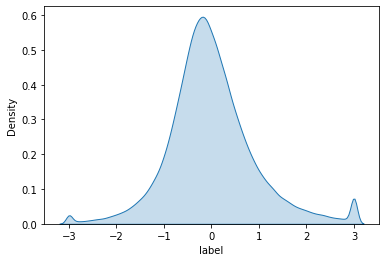

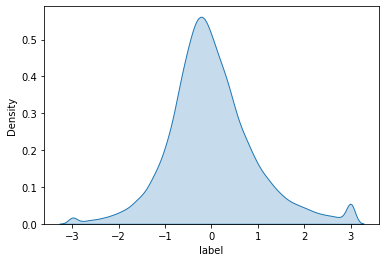

norm data done 

all works done 



,open1,open2,open3,open4,open5,open6,open7,open8,open9,open10,...,amount51,amount52,amount53,amount54,amount55,amount56,amount57,amount58,amount59,amount60
count,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,...,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000,449704.000000
mean,0.004338,0.004367,0.003999,0.003739,0.003310,0.003198,0.002995,0.002835,0.002650,0.002467,...,-0.031275,-0.031395,-0.031615,-0.032018,-0.031783,-0.032038,-0.032481,-0.032800,-0.033175,-0.033698
std,0.944183,0.944684,0.945826,0.947029,0.948232,0.948703,0.949601,0.951215,0.952011,0.952575,...,0.838453,0.837814,0.836659,0.833890,0.835554,0.833234,0.830060,0.827951,0.824249,0.819455
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-1.445199,-1.533575,-1.361656,-1.368765,-1.410224,-1.532145,-1.513356,-1.555138,-1.821192,-1.588900
25%,-0.500444,-0.506077,-0.509069,-0.514232,-0.520229,-0.524514,-0.528325,-0.535759,-0.539026,-0.541481,...,-0.583727,-0.582996,-0.582088,-0.578347,-0.579072,-0.576338,-0.573547,-0.570964,-0.567871,-0.562710
50%,0.059929,0.057144,0.055720,0.054804,0.052222,0.052985,0.053283,0.053073,0.053387,0.053342,...,-0.326274,-0.325760,-0.324923,-0.324561,-0.324763,-0.324257,-0.323659,-0.322292,-0.319795,-0.316042
75%,0.557856,0.559249,0.560502,0.563786,0.567616,0.570512,0.575438,0.579007,0.582981,0.585663,...,0.226299,0.222405,0.220805,0.215326,0.213671,0.211173,0.208476,0.205798,0.201340,0.191949
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [3]:
X_test = X[X.index.isin(df_test.index)]
X = X[~X.index.isin(df_test.index)]
result = scutquant.auto_process(X, 'label', groupby='instrument', datetime='datetime', select=False, orth=False, label_norm=True)
x_train, y_train, x_valid, y_valid = result["X_train"], result["y_train"], result["X_test"], result["y_test"]
x_train.describe()

In [4]:
# 手动处理测试集
X_test = X_test.groupby(['instrument']).fillna(method='ffill').dropna()
x_test = X_test.copy()
y_test = x_test.pop('label')
col = x_train.columns
x_test = x_test[col]
x_test = scutquant.zscorenorm(x_test, x_test.groupby("datetime").mean(), x_test.groupby("datetime").std())

ymean = y_test.groupby("instrument").shift(2).groupby("datetime").mean()
ystd = y_test.groupby("instrument").shift(2).groupby("datetime").std()
ymean.fillna(0.0002, inplace=True)  # 假设年化5%, 即约为无风险收益率, 则每天应为0.0002
ystd.fillna(0.0189, inplace=True)  # 假设年化波动率为30%, 即0.3, 则每天的波动率应为0.0189

In [5]:
from tensorflow.keras import layers, models, optimizers, metrics, regularizers

rmse = metrics.RootMeanSquaredError(name="rmse")
model = models.Sequential([
    # 第一层: 相当于将原始数据换了一组基，得到新的360个特征, 每个新特征由所有原始特征的线性函数和一个非线性函数swish()合成
    layers.Dense(360, activation='swish', use_bias=False),  
    
    # 第二、三层: # 使用新的数据合成因子, 使用swish函数过滤噪声, 并进行正则化
    layers.Dense(1024, activation='swish', use_bias=False, kernel_regularizer=regularizers.l2(0.002)),  
    layers.Dense(1024, activation='swish', use_bias=False, kernel_regularizer=regularizers.l2(0.002)),  
    layers.LayerNormalization(),  # 因子标准化
    
    # 第四层: y_hat = W * X + b(岭回归, 加入了l2正则), W是因子收益率, X为因子, b即alpha收益(不随因子变化而变化)
    layers.Dense(1, kernel_regularizer=regularizers.l2(0.002))  
])
model.compile(optimizer=optimizers.Adam(0.0003), loss=metrics.mean_squared_error, metrics=[rmse, 'mae'])
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
3514/3514 [==============================] - 115s 32ms/step - loss: 2.2939 - rmse: 0.9407 - mae: 0.6911 - val_loss: 1.1712 - val_rmse: 0.9458 - val_mae: 0.7077
Epoch 2/20
3514/3514 [==============================] - 111s 32ms/step - loss: 0.9198 - rmse: 0.9187 - mae: 0.6738 - val_loss: 0.9093 - val_rmse: 0.9473 - val_mae: 0.7113
Epoch 3/20
3514/3514 [==============================] - 100s 29ms/step - loss: 0.8485 - rmse: 0.9169 - mae: 0.6718 - val_loss: 0.8962 - val_rmse: 0.9436 - val_mae: 0.6995
Epoch 4/20
3514/3514 [==============================] - 101s 29ms/step - loss: 0.8437 - rmse: 0.9160 - mae: 0.6709 - val_loss: 0.8939 - val_rmse: 0.9434 - val_mae: 0.7009
Epoch 5/20
3514/3514 [==============================] - 102s 29ms/step - loss: 0.8413 - rmse: 0.9155 - mae: 0.6704 - val_loss: 0.8919 - val_rmse: 0.9433 - val_mae: 0.7002
Epoch 6/20
3514/3514 [==============================] - 107s 30ms/step - loss: 0.8405 - rmse: 0.9153 - mae: 0.6702 - val_loss: 0.8936 - val_rmse:

In [6]:
pred = model.predict(x_test)
pred = pd.DataFrame(pred, columns=["predict"], index=x_test.index)
pred["predict"] += ymean
pred["predict"] *= ystd
pred.describe()

2205/2205 [==============================] - 8s 4ms/step


,predict
count,70552.000000
mean,-0.000066
std,0.001600
min,-0.009688
25%,-0.000855
50%,-0.000271
75%,0.000505
max,0.033200


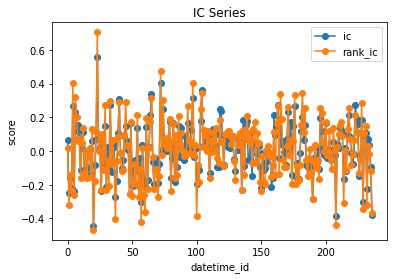

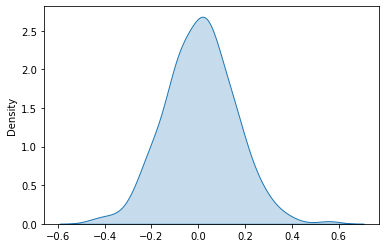

ic= 0.006456356762796204 icir= 0.0435005461422122 rank_ic= 0.005276641570870419 rank_icir= 0.029654137862857654


0.0054594323538000224

In [7]:
# 使用IC评判拟合优度
ic, icir, rank_ic, rank_icir = scutquant.ic_ana(pred, y_test, groupby='datetime')
print('ic=', ic, 'icir=', icir, 'rank_ic=', rank_ic, 'rank_icir=', rank_icir)
# 使用pearson相关系数评判拟合优度
r = scutquant.pearson_corr(pred.values, y_test)
r[0]

In [8]:
from scutquant import executor, report

# 将预测值处理成回测需要的格式
pred = executor.prepare(pred, df_test, time='datetime', price='close', volume='volume')
pred

predict           t        price     volume
time       code                                                   
2022-01-04 000001.SZ  0.000228  2022-01-04  1724.810723  116925933
           000002.SZ -0.000506  2022-01-04  2576.444458  194720202
           000063.SZ -0.000605  2022-01-04   420.676392   29003438
           000066.SZ -0.000786  2022-01-04   123.552888   83705296
           000069.SZ -0.001237  2022-01-04   270.898518   73778655
...                        ...         ...          ...        ...
2022-12-22 688363.SH -0.002575  2022-12-22   130.842543    4758190
           688396.SH  0.000909  2022-12-22    52.735905    2970253
           688561.SH  0.000492  2022-12-22    67.160000    1149844
           688599.SH  0.000481  2022-12-22    54.938671   19136216
           688981.SH -0.000436  2022-12-22    41.060000    6744443

[70252 rows x 4 columns]

Accuracy of Prediction: 0.5466605932927177


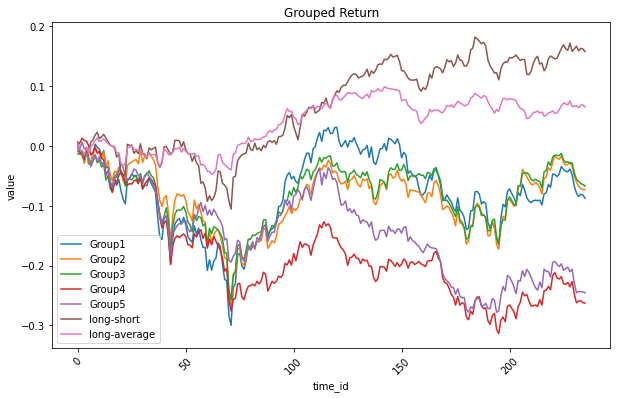

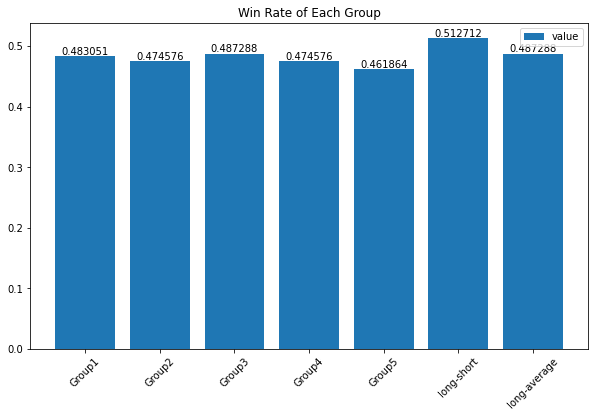

In [9]:
report.group_return_ana(pred, y_test)

In [10]:
backtest = {
    "generator": {
        "mode": "generate"
    },
    "strategy": {
        "class": "TopKStrategy",  # 做多预测值前20%且值大于0.5%的股票, 做空后20%且值小于0.5%的股票. 自动平仓
        "kwargs": {
            "auto_offset": True,
            "offset_freq": 2, # 应为delta_t + 1, 例如目标值是close_-2 / close_-1 - 1, 则delta_t = 1
            "buy_only": True,  # =True时，只做多不做空(在A股做空有一定的难度)
            "risk_degree": 0.95,  # 将风险度控制在这个数，如果超过了就按比例减持股票直到风险度小于等于它为止
            "unit": None,  # 由于数据已经是以手为单位, 故无需二次处理
            "max_volume": 0.01  # 手数随可用资金而改变，最大不会超过股票当天成交量的0.2%(例如T+1时下单，下单手数不会超过T时成交量的0.2%)
        }
    },
    "account": None,  # 使用默认账户, 即初始资金为1亿, 无底仓
    "trade_params": {
        "cost_buy": 0.0015,  # 佣金加上印花税
        "cost_sell": 0.0005,  
        "min_cost": 5,
    }
}
generator, strategy, account, trade_params = backtest["generator"], backtest["strategy"], backtest["account"], backtest["trade_params"]
exe = executor.Executor(generator, strategy, account, trade_params)
exe.execute(data=pred, verbose=0)

E(r): -0.06536750072707537
std: 0.02773425738679027
E(r_benchmark): -0.12867191898052116
std_benchmark: 0.05329655828798661 

Cumulative Rate of Return: -0.1045329175494466
Cumulative Rate of Return(benchmark): -0.1858229210189083
Cumulative Excess Rate of Return: 0.08129000346946169 

Max Drawdown: -0.1149539414368439
Max Drawdown(benchmark): -0.23197087771901204 

Sharpe Ratio: -2.359886244477948
Sortino Ratio: 10.744097916549382
Information Ratio: 2.2825351827735423 

Pearson Correlation Coefficient Between Return and Benchmark: 0.9580048451755167
Profitable Days(%): 0.9830508474576272


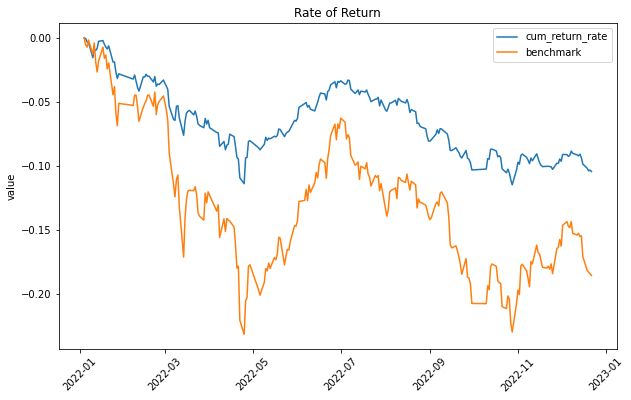

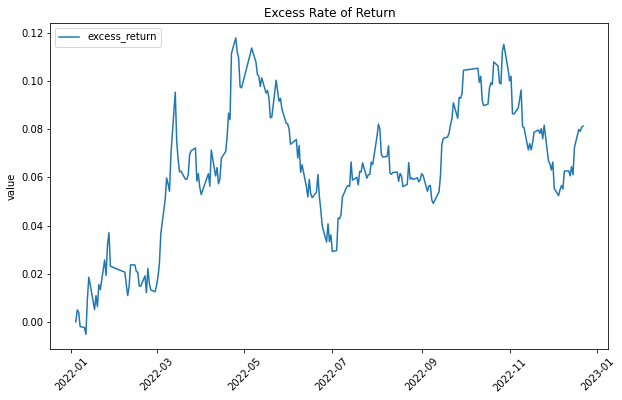

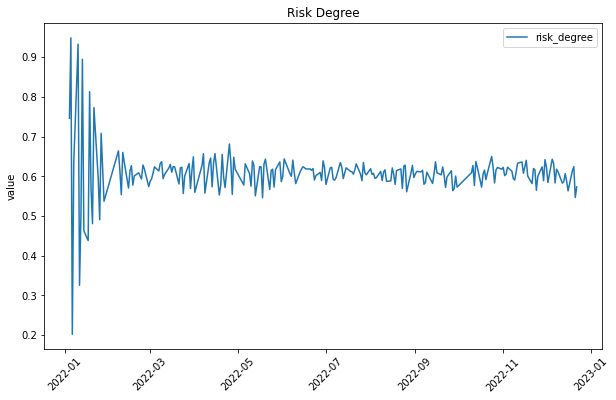

In [11]:
user_account, benchmark = exe.user_account, exe.benchmark
report.report_all(user_account, benchmark, freq=365, time=exe.time)  # 无风险收益率默认为年化3%，可以通过参数rf调节

In [12]:
model.save("dnn")

INFO:tensorflow:Assets written to: dnn\assets


INFO:tensorflow:Assets written to: dnn\assets
